In [82]:
from gurobipy import *
import numpy as np
import time

prueba = 1+2

# Problema 1

In [83]:
#Abrir un archivo excel
import pandas as pd

#como leer un archivo .csv
data = pd.read_csv('clientes2.csv', sep=';')
print(data)


            x         y   demanda
0      7,9744  -11,3045   147,199
1    -13,6786   -3,3825   161,327
2     -8,8032  -10,3279  172,4834
3    -15,3621    9,4144  133,8201
4     -9,0891   -7,9311  129,8221
..        ...       ...       ...
995   -6,2143    -10,86  155,4059
996  -11,7203   -2,1472  132,1921
997    6,4149    7,9825  126,1607
998    5,9054   12,7097  156,3924
999   -9,4583   -7,1544  141,3835

[1000 rows x 3 columns]


## Pre-procesamiento

In [84]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        valor = data.iloc[i,j]
        valor = valor.replace(",",".")
        data.iloc[i,j] = valor
data = data.applymap(float)

# data = data.iloc[0:100]
print(data)

           x        y   demanda
0     7.9744 -11.3045  147.1990
1   -13.6786  -3.3825  161.3270
2    -8.8032 -10.3279  172.4834
3   -15.3621   9.4144  133.8201
4    -9.0891  -7.9311  129.8221
..       ...      ...       ...
995  -6.2143 -10.8600  155.4059
996 -11.7203  -2.1472  132.1921
997   6.4149   7.9825  126.1607
998   5.9054  12.7097  156.3924
999  -9.4583  -7.1544  141.3835

[1000 rows x 3 columns]


C:\Users\mrive\AppData\Local\Temp\ipykernel_22452\2553919280.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(float)


### Pregunta 1

Programar una función que reciba un centro aleatorio (x,y) y un conjunto de datos de clientes con sus pesos. Definiendo como método de detención que la diferencia de coordenadas entre iteraciones no sea mayor que 1*10^-5. El algoritmo debe reportar la ubicación óprima, el tiempo de ejecución y el número de iteraciones realizadas para encontrar el óptimo

In [85]:
import random
import time

def centro_euclidiano(x=0, y=0, data=0, logs = True):
    
    data = data.reset_index(drop=True)
    
    x_new = x+1
    y_new = y+1

    x_i = data.iloc[:,0]
    y_i = data.iloc[:,1]
    pesos = data.iloc[:,2]
    contador = 0
    time_0 = time.time()
    while (abs(x-x_new)>0.00001 and abs(y-y_new)>0.00001):
        contador += 1
        sum = 0
        sum_new_x = 0
        sum_g_i = 0
        sum_new_y = 0
        for i in range(len(data)):
        
            distancia = ((x-float(x_i[i]))**2+(y-float(y_i[i]))**2)**(1/2)
            fx = float(pesos[i])*distancia
            sum += fx
            
            g_i= (pesos[i]/distancia)
            
            sum_new_x += (x_i[i]*g_i)
            sum_new_y += (y_i[i]*g_i)
            sum_g_i += g_i
            time_n = time.time()
            
        x, y = x_new, y_new
        x_new = sum_new_x/sum_g_i
        y_new = sum_new_y/sum_g_i
        tiempo = time_n-time_0
    if logs:
        print(f'El modelo de localización arrojó las coordenadas x: {x_new} y: {y_new}')
        print(f'El modelo se demoró un tiempo de {tiempo} segundos y {contador} iteraciones')
    return x_new, y_new, tiempo, contador


x=random.randint(-2,2)
y=random.randint(-2,2)
posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data)

    

El modelo de localización arrojó las coordenadas x: -2.1906039609891472 y: -4.507432293383182
El modelo se demoró un tiempo de 0.3210270404815674 segundos y 36 iteraciones


### Pregunta 1.2
Usando los datos de 'clientes2.csv' y tomando una muestra de 250 clientes al azar, realice 100 repeticiones del algoritmo partiendo desde distintos puntos aleatorios. Reporte los estadísticos básicos (media, desviación, gráfico box plot) para los tiempos de ejecución y número de iteraciones

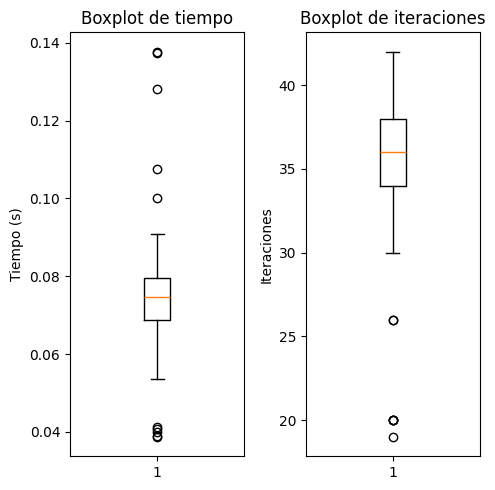

                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -2.976152   -4.725833    0.074786    35.260000
std      0.016891    0.001445    0.015567     4.764388
min     -2.999226   -4.728408    0.038652    19.000000
25%     -2.979671   -4.726146    0.068666    34.000000
50%     -2.979031   -4.726053    0.074658    36.000000
75%     -2.978584   -4.725990    0.079612    38.000000
max     -2.882486   -4.718549    0.137778    42.000000
           x         y    tiempo  iteraciones
0  -2.980124 -4.726213  0.085102         36.0
1  -2.978762 -4.726015  0.084833         42.0
2  -2.979138 -4.726068  0.071428         36.0
3  -2.907394 -4.719706  0.038979         20.0
4  -2.979530 -4.726126  0.072773         36.0
..       ...       ...       ...          ...
95 -2.979126 -4.726067  0.075689         38.0
96 -2.978584 -4.725990  0.074690         38.0
97 -2.979965 -4.726184  0.059090         31.0
98 -2.979507 -4.726122  0.085515         38.0

In [100]:
import matplotlib.pyplot as plt

data_sample = data.sample(n=250)


max_value_x = round(data_sample.iloc[:,0].max())
min_value_x = round(data_sample.iloc[:,0].min())
max_value_y = round(data_sample.iloc[:,1].max())
min_value_y = round(data_sample.iloc[:,1].min())

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_sample, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]
    

fig, axes = plt.subplots(1,2,figsize=(5,5))

axes[0].boxplot(df_estadisticos['tiempo'])
axes[0].set_title('Boxplot de tiempo')
axes[0].set_ylabel('Tiempo (s)')

axes[1].boxplot(df_estadisticos['iteraciones'])
axes[1].set_title('Boxplot de iteraciones')
axes[1].set_ylabel('Iteraciones')

plt.tight_layout()

plt.show()

print(df_estadisticos.describe())
print(df_estadisticos)


### Pregunta 1.3
Repita la parte 1.2 pero ahora usando distinta cantidad de clientes. Tome un subconjunto de los clientes del archivo y repita el experimento con los primeros 50, 100, 500, 1000 clientes de la base. Compare en un gráfico los distintos boxplot, tanto para los tiempos de ejecución como número de iteraciones. Explique el resultado

In [167]:
# Preguntar si es que son LOS PRIMEROS o si es que hay que sacar una muestra al azar de tamaño 50, 100 o 500

data_50 = data.iloc[0:50]
data_100 = data.iloc[0:100]
data_500 = data.iloc[0:500]


###### Para los primeros 50 ######

max_value_x_50 = round(data_50.iloc[:,0].max())
min_value_x_50 = round(data_50.iloc[:,0].min())
max_value_y_50 = round(data_50.iloc[:,1].max())
min_value_y_50 = round(data_50.iloc[:,1].min())

df_estadisticos_50 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_50,max_value_x_50)
    y=random.randint(min_value_y_50,max_value_y_50)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_50, logs=False)
    df_estadisticos_50.loc[i] = [posx, posy, tiempo, iteraciones]

###### Para los primeros 100 ######

max_value_x_100 = round(data_100.iloc[:,0].max())
min_value_x_100 = round(data_100.iloc[:,0].min())
max_value_y_100 = round(data_100.iloc[:,1].max())
min_value_y_100 = round(data_100.iloc[:,1].min())

df_estadisticos_100 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_100,max_value_x_100)
    y=random.randint(min_value_y_100,max_value_y_100)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_100, logs=False)
    df_estadisticos_100.loc[i] = [posx, posy, tiempo, iteraciones]


###### Para los primeros 500 ######

max_value_x_500 = round(data_500.iloc[:,0].max())
min_value_x_500 = round(data_500.iloc[:,0].min())
max_value_y_500 = round(data_500.iloc[:,1].max())
min_value_y_500 = round(data_500.iloc[:,1].min())

df_estadisticos_500 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_500,max_value_x_500)
    y=random.randint(min_value_y_500,max_value_y_500)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_500, logs=False)
    df_estadisticos_500.loc[i] = [posx, posy, tiempo, iteraciones]
    
    
###### Para los primeros 1000 ######

max_value_x_1000 = round(data.iloc[:,0].max())
min_value_x_1000 = round(data.iloc[:,0].min())
max_value_y_1000 = round(data.iloc[:,1].max())
min_value_y_1000 = round(data.iloc[:,1].min())

df_estadisticos_1000 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data, logs=False)
    df_estadisticos_1000.loc[i] = [posx, posy, tiempo, iteraciones]
    
print(df_estadisticos_50.describe(), df_estadisticos_100.describe(), df_estadisticos_500.describe(), df_estadisticos_1000.describe())


                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.262123   -6.729557    0.017410    37.220000
std      0.007226    0.001257    0.005428     5.036393
min     -3.300788   -6.741730    0.008004    18.000000
25%     -3.262668   -6.729491    0.014161    34.750000
50%     -3.262433   -6.729418    0.015976    38.000000
75%     -3.262136   -6.729361    0.018991    40.000000
max     -3.202445   -6.728136    0.047794    52.000000                 x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.980489   -5.044757    0.026715    32.530000
std      0.032427    0.005637    0.004917     5.454041
min     -3.989378   -5.046515    0.010581    14.000000
25%     -3.986405   -5.046082    0.024004    30.000000
50%     -3.986297   -5.046060    0.027520    34.000000
75%     -3.986173   -5.045999    0.029988    36.000000
max     -3.697788   -5.002003    0.040580    42.000000           

In [177]:
print(data_50.describe(), '\n', data_100.describe(), '\n', data_500.describe(), '\n', data.describe())

               x          y     demanda
count  50.000000  50.000000   50.000000
mean   -1.175942  -4.911742  149.108546
std    10.069588   9.525324   26.757517
min   -15.362100 -18.073700  100.810500
25%    -9.701200 -11.819600  130.482700
50%    -5.417400  -8.166550  147.822350
75%     7.643625   1.209575  166.226875
max    14.676400  15.738300  211.439200 
                 x           y     demanda
count  100.000000  100.000000  100.000000
mean    -1.171814   -3.897002  149.750156
std      9.934664    9.149004   28.210610
min    -16.366900  -18.073700   90.171200
25%     -9.625725  -10.506300  130.080475
50%     -4.593350   -6.830850  147.822350
75%      7.521700    1.278500  170.862175
max     16.912300   15.738300  211.439200 
                 x           y     demanda
count  500.000000  500.000000  500.000000
mean     0.036199   -3.627976  149.941302
std     10.775372    8.973269   29.982003
min    -21.457700  -21.626700   65.764500
25%    -10.002200  -10.579075  128.735550
50%   

### Graficamos los resultados

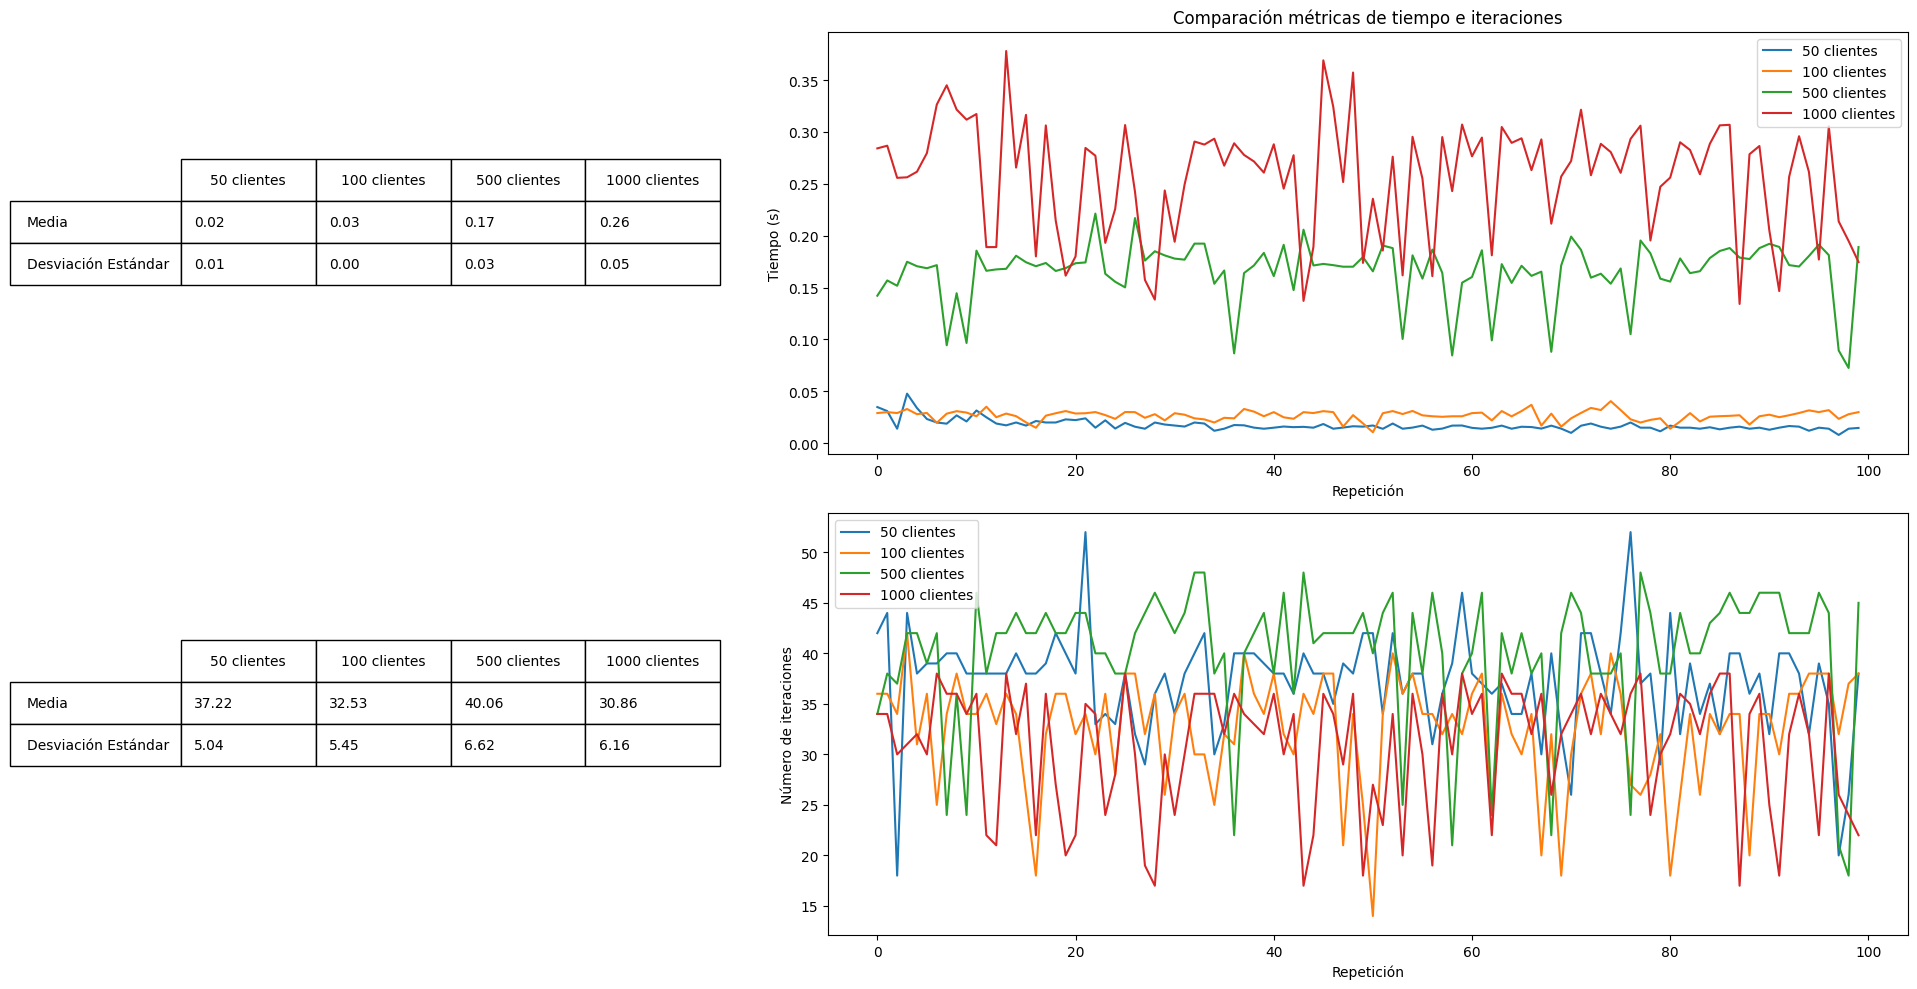

In [173]:

###### Gráfico de comparaciones de tiempos ######

metricas_tiempo = {
    'Media': [df_estadisticos_50['tiempo'].mean(), df_estadisticos_100['tiempo'].mean(), df_estadisticos_500['tiempo'].mean(), df_estadisticos_1000['tiempo'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['tiempo'].std(), df_estadisticos_100['tiempo'].std(), df_estadisticos_500['tiempo'].std(), df_estadisticos_1000['tiempo'].std()],
}


fig, axes = plt.subplots(2,1,figsize=(20,10))

axes[0].plot(df_estadisticos_50['tiempo'], label='50 clientes')
axes[0].plot(df_estadisticos_100['tiempo'], label='100 clientes')
axes[0].plot(df_estadisticos_500['tiempo'], label='500 clientes')
axes[0].plot(df_estadisticos_1000['tiempo'], label='1000 clientes')

axes[0].set_title('Comparación métricas de tiempo e iteraciones')
axes[0].set_xlabel('Repetición')
axes[0].set_ylabel('Tiempo (s)')

axes[0].legend()

table_data_tiempo = [[f'{metrica:.2f}' for metrica in metricas_tiempo[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[0].table(cellText = table_data_tiempo,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])

###### Gráfico de comparaciones de iteraciones ######

metricas_iteraciones = {
    'Media': [df_estadisticos_50['iteraciones'].mean(), df_estadisticos_100['iteraciones'].mean(), df_estadisticos_500['iteraciones'].mean(), df_estadisticos_1000['iteraciones'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['iteraciones'].std(), df_estadisticos_100['iteraciones'].std(), df_estadisticos_500['iteraciones'].std(), df_estadisticos_1000['iteraciones'].std()],
}

axes[1].plot(df_estadisticos_50['iteraciones'], label='50 clientes')
axes[1].plot(df_estadisticos_100['iteraciones'], label='100 clientes')
axes[1].plot(df_estadisticos_500['iteraciones'], label='500 clientes')
axes[1].plot(df_estadisticos_1000['iteraciones'], label='1000 clientes')

axes[1].set_xlabel('Repetición')
axes[1].set_ylabel('Número de iteraciones')

axes[1].legend()

table_data_iteraciones = [[f'{metrica:.2f}' for metrica in metricas_iteraciones[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[1].table(cellText = table_data_iteraciones,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])


plt.subplots_adjust(left=0.3, bottom=0.2, hspace=0.5, wspace=0.5)
plt.tight_layout()

plt.show()


## Resultados

### Comparación en tiempo

Los resultados revelan que a medida que tenemos más datos siendo procesados por el algoritmo, va aumentando el costo en tiempo e incluso decir que podría tener un costo que va aumentando de manera casi exponencial, esto se explica ya que, como se pidió en la pregunta 1.2, hay que realizar 100 repeticiones para cada muestra requerida, lo que significa que para las muestras más pequeñas, repetir el proceso 100 veces no va a significar un impacto tan grande como lo es el repetir el proceso para las muestras más grandes, otro factor que también tiene un impacto no menor, es el hecho de que las coordenadas iniciales son puntos al azar, para este problema las coordenadas iniciales son puntos dentro de un rango, este rango corresponde a los mínimos y máximos obtenidos dentro de cada muestra, debido a este factor se podría explicar que la desviación estándar para cada muestra no es tan grande y que aumenta a medida que va creciendo el tamaño de la muestra, a medida que aumenta el número de clientes, los mínimos se van alejando cada vez más de los máximos

### Pregunta 1.4
Para el caso de 1000 clientes. Vamos a comparar el método anterior pero eligiendo un buen punto de partida, no al azar como antes. Use el método de distancia cuadrática como solución para el punto de partida. Reporte el tiempo y el número de iteraciones. ¿Por que este resultado es mejor? 


In [189]:
## Calculamos las coordenadas iniciales con el método de distancia cuadrática ##

# Como vamos a calcularlo solo para el caso de 1000 clientes, podemos calcular las coordenadas iniciales usando el df completo afuera de la función de centro euclidiano

sum_pesos = data.iloc[:,2].sum()

print(sum_pesos)

den_x = 0  
den_y = 0

for i in range(len(data)):
    den_x += (data.iloc[i,0]*data.iloc[i,2])
    den_y += (data.iloc[i,1]*data.iloc[i,2])

print(den_x, den_y)

x_inicial = den_x/sum_pesos
y_inicial = den_y/sum_pesos

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    
    posx, posy, tiempo, iteraciones = centro_euclidiano(x_inicial, y_inicial, data, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]




150868.5339
-586.0032229500265 -532996.14560778
-0.0038841977700827014 -3.5328516280344124
-0.0814607


# Problema 2

In [87]:
data_centros = pd.read_csv('cd2.csv', sep=';')
#display(data_centros)

for i in range(len(data_centros)):
    for j in range(len(data_centros.columns)):
        valor = data_centros.iloc[i,j]
        valor = valor.replace(",",".")
        data_centros.iloc[i,j] = valor
data_centros = data_centros.applymap(float)

# data = data.iloc[0:100]
display(data_centros)

data_clientes = data
display(data_clientes)

C:\Users\mrive\AppData\Local\Temp\ipykernel_22452\2146295990.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_centros = data_centros.applymap(float)


,x,y
0,-4.9089,-13.2162
1,7.9829,-6.6164
2,-16.3669,-7.0845
3,-12.8194,-4.2092
4,9.4519,-11.0707
5,12.4499,-11.7062
6,16.6514,6.9430
7,2.2336,-10.4537
8,11.4180,-7.7356
9,-4.8833,-10.8051


,x,y,demanda
0,7.9744,-11.3045,147.1990
1,-13.6786,-3.3825,161.3270
2,-8.8032,-10.3279,172.4834
3,-15.3621,9.4144,133.8201
4,-9.0891,-7.9311,129.8221
...,...,...,...
995,-6.2143,-10.8600,155.4059
996,-11.7203,-2.1472,132.1921
997,6.4149,7.9825,126.1607
998,5.9054,12.7097,156.3924


In [88]:
n = len(data_clientes)
valores_N = list(range(1,n+1))

m = len(data_centros) #cantidad de instalaciones
valores_M = list(range(1,m+1))


conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]

In [89]:
np.random.seed(100)
matriz_c = np.zeros((n,m)) #costo transporte


for i in range(n):      # iterar sobre las filas (clientes)
    for j in range(m):  # iterar sobre las columnas (centros)
        matriz_c[i, j] = (((data_clientes.iloc[i,0]-data_centros.iloc[j,0])**2)+((data_clientes.iloc[i,1]-data_centros.iloc[j,1])**2))**(1/2)



costo_grande = 850
matriz_f = np.full((1, m), costo_grande) #costo instalación

matriz_d = np.zeros((n,1))
for i in range(n):
    matriz_d[i,0]=data_clientes.iloc[i, 2] #demanda clientes


demanda_grande = 50000
matriz_cap = np.full((1, m), demanda_grande)

matriz_c, matriz_f, matriz_d, matriz_cap

(array([[13.02436239,  4.68810771, 24.7043981 , ..., 18.02167516,
         27.87401614, 13.83411637],
        [13.17608795, 21.90156824,  4.57512414, ...,  7.57122211,
         13.87888339, 14.09061405],
        [ 4.84848939, 17.19152074,  8.22977529, ...,  1.24090638,
         20.36310017, 13.57062448],
        ...,
        [24.0335875 , 14.68286434, 27.31345639, ..., 24.34787975,
         16.53841734, 10.2406664 ],
        [28.09094828, 19.4374419 , 29.79707538, ..., 27.72566001,
         16.1345661 , 14.01464317],
        [ 7.57908039, 17.44949574,  6.90895361, ...,  2.89670127,
         17.16295074, 11.85937934]]),
 array([[850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850,
         850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850, 850,
         850, 850, 850, 850, 850, 850, 850, 850, 850]]),
 array([[147.199 ],
        [161.327 ],
        [172.4834],
        [133.8201],
        [129.8221],
        [135.8759],
        [137.4951],
        [116.0237],
        

In [90]:
problema2 = Model("problema 2")

x_ij = problema2.addVars(indices, vtype= GRB.BINARY, name = "x_ij")
y_j = problema2.addVars(conjunto_M, vtype= GRB.BINARY, name = "y_j")

problema2.setObjective(quicksum(matriz_c[i-1, j-1]*x_ij[i,j] for (i,j) in indices) + quicksum(matriz_f[0, j-1]*y_j[j] for j in conjunto_M), GRB.MINIMIZE)

In [91]:
#Restricciones

problema2.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente
problema2.addConstrs(x_ij[i,j] <= y_j[j] for (i,j) in indices)  #si no se hace el centro no se asigna cliente
problema2.addConstrs(quicksum(matriz_d[i-1,0]*x_ij[i,j] for i in conjunto_N) <= matriz_cap[0, j-1]*y_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2.addConstr(quicksum(y_j[j] for j in conjunto_M) == 4)  #se deben hacer 4 centros


<gurobi.Constr *Awaiting Model Update*>

In [92]:
problema2.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 11.0 (22631.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 36036 rows, 35035 columns and 140070 nonzeros
Model fingerprint: 0xaee73385
Variable types: 0 continuous, 35035 integer (35035 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [1e-01, 9e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 23313.090703
Presolve time: 0.13s
Presolved: 36036 rows, 35035 columns, 140070 nonzeros
Variable types: 0 continuous, 35035 integer (35035 binary)
Found heuristic solution: objective 16620.903534
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.00s

Solved with dual simplex

Root relaxation: objective 8.208644e+03, 5728 i

In [93]:
print(f"los costos mínimos totales son {problema2.ObjVal}")


los costos mínimos totales son 8208.643636136163


In [94]:
problema2.getVars()

[<gurobi.Var x_ij[1,1] (value -0.0)>,
 <gurobi.Var x_ij[1,2] (value -0.0)>,
 <gurobi.Var x_ij[1,3] (value -0.0)>,
 <gurobi.Var x_ij[1,4] (value -0.0)>,
 <gurobi.Var x_ij[1,5] (value 0.0)>,
 <gurobi.Var x_ij[1,6] (value 0.0)>,
 <gurobi.Var x_ij[1,7] (value -0.0)>,
 <gurobi.Var x_ij[1,8] (value -0.0)>,
 <gurobi.Var x_ij[1,9] (value -0.0)>,
 <gurobi.Var x_ij[1,10] (value -0.0)>,
 <gurobi.Var x_ij[1,11] (value -0.0)>,
 <gurobi.Var x_ij[1,12] (value -0.0)>,
 <gurobi.Var x_ij[1,13] (value -0.0)>,
 <gurobi.Var x_ij[1,14] (value -0.0)>,
 <gurobi.Var x_ij[1,15] (value -0.0)>,
 <gurobi.Var x_ij[1,16] (value -0.0)>,
 <gurobi.Var x_ij[1,17] (value -0.0)>,
 <gurobi.Var x_ij[1,18] (value -0.0)>,
 <gurobi.Var x_ij[1,19] (value -0.0)>,
 <gurobi.Var x_ij[1,20] (value -0.0)>,
 <gurobi.Var x_ij[1,21] (value -0.0)>,
 <gurobi.Var x_ij[1,22] (value -0.0)>,
 <gurobi.Var x_ij[1,23] (value -0.0)>,
 <gurobi.Var x_ij[1,24] (value -0.0)>,
 <gurobi.Var x_ij[1,25] (value -0.0)>,
 <gurobi.Var x_ij[1,26] (value 0.0)>